<a href="https://colab.research.google.com/github/jmcarbo/medicalimages/blob/main/Pr%C3%A0ctica_5_Imatge_biom%C3%A8dica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pràctica 5 - Imatge biomèdica

In [ ]:
import os
import shutil

if not os.path.isfile("bbid.py"):
  os.system("wget https://raw.githubusercontent.com/ostrolucky/Bulk-Bing-Image-downloader/master/bbid.py")
  os.system("chmod +x bbid.py")
if os.path.isdir('images'):
  shutil.rmtree('images')
os.mkdir("images")
image_classes = ["femur", 
                 "pulmonary carcinoma", 
                 "enphysema radiography", 
                 "melanoma", 
                 "erithema nodosum"]
for i in image_classes:
  os.mkdir( "images/" + i)

In [ ]:
for i in image_classes:
  os.system(f'./bbid.py -s "{i} dicom" -o "images/{i}" --limit 10')

In [ ]:
!git clone https://github.com/matsui528/sis.git
!cd sis && pip install -r requirements.txt

fatal: destination path 'sis' already exists and is not an empty directory.


553467904/553467096 [==============================] - 3s 0us/step


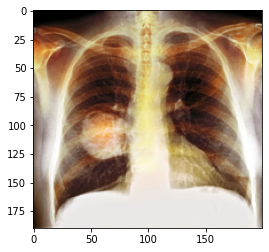

In [ ]:
from PIL import Image
from sis.feature_extractor import FeatureExtractor
from pathlib import Path
import numpy as np
from matplotlib.pyplot import imshow


#%matplotlib inline


fe = FeatureExtractor()

for img_path in sorted(Path("./images").rglob("**/*.*")):
    #print(img_path)  # e.g., ./static/img/xxx.jpg
    im=Image.open(img_path)
    size=200,200
    im.thumbnail(size)
    imshow(np.asarray(im))
    feature = fe.extract(img=Image.open(img_path))
    feature_path = Path("./sis/static/feature") / (img_path.stem + ".npy")  # e.g., ./static/feature/xxx.npy
    np.save(feature_path, feature)

In [ ]:
import numpy as np
from PIL import Image
from sis.feature_extractor import FeatureExtractor
from datetime import datetime
from pathlib import Path


# Read image features
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("./sis/static/feature").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("./static/img") / (feature_path.stem + ".jpg"))
features = np.array(features)

img = Image.open("images/femur/192249.jpg")  # PIL image
query = fe.extract(img)
dists = np.linalg.norm(features-query, axis=1)  # L2 distances to features
ids = np.argsort(dists)[:30]  # Top 30 results
scores = [(dists[id], img_paths[id]) for id in ids]
scores

[(0.0, PosixPath('static/img/192249.jpg')),
 (0.7863298, PosixPath('static/img/333097.jpg')),
 (0.9071281, PosixPath('static/img/352540.jpg')),
 (0.9626942, PosixPath('static/img/femur1350109720816.jpg')),
 (0.97118634, PosixPath('static/img/femur.jpg')),
 (1.040726, PosixPath('static/img/right_femur1330900071859.jpg')),
 (1.0473579, PosixPath('static/img/1920px-Femur_-_anterior_view2.jpg')),
 (1.0814257, PosixPath('static/img/femur1326853695805.jpg')),
 (1.1755447, PosixPath('static/img/hqdefault.jpg')),
 (1.184566, PosixPath('static/img/peds-femur-1.jpg')),
 (1.1990749, PosixPath('static/img/Erythemanodosum-60cff04f4e8645f3bb31.jpg')),
 (1.1992366, PosixPath('static/img/maxresdefault.jpg')),
 (1.2021914, PosixPath('static/img/1920px-ENlegs.jpg')),
 (1.2092196, PosixPath('static/img/13256_2010_Article_1564_Fig3_HTML.jpg')),
 (1.211316, PosixPath('static/img/ch976.fig1_-565x848.jpg')),
 (1.2119327, PosixPath('static/img/Several-sections-of-a-lung-tumour-pr.jpg')),
 (1.2172976, PosixPat

In [ ]:
import portpicker
port = portpicker.pick_unused_port()
print(port)

from google.colab import output
print(output.serve_kernel_port_as_window(port))



#from google.colab import output
#output.serve_kernel_port_as_iframe(port)






24063


<IPython.core.display.Javascript object>

None


In [ ]:
#%%writefile bla.py
from random import random
import portpicker
port = portpicker.pick_unused_port()
print(port)

from google.colab import output
print(output.serve_kernel_port_as_window(port))
from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!" + str(random())

if __name__ == '__main__':
  app.run(host="localhost", port=port, debug=True , use_reloader=False)

19591


<IPython.core.display.Javascript object>

None
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://localhost:19591/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Jan/2021 12:22:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:12] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/Jan/2021 12:22:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:14] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/Jan/2021 12:22:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:15] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/Jan/2021 12:22:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:16] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/Jan/2021 12:22:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:22:18] "GET /favicon.ico 

In [ ]:
!python3 bla.py &



 * Running on http://localhost:22955/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 187-551-606
127.0.0.1 - - [31/Jan/2021 12:07:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:07:10] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/Jan/2021 12:07:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2021 12:07:26] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
!ps


    PID TTY          TIME CMD
      1 ?        00:00:01 node
     14 ?        00:00:00 tail
     49 ?        00:00:01 jupyter-noteboo
     50 ?        00:00:00 dap_multiplexer
     60 ?        00:00:01 python3
    115 ?        00:00:00 python2
    123 ?        00:00:00 python2
    136 ?        00:00:00 ps


In [ ]:
%%html
<link rel="stylesheet" href="/nbextensions/google.colab/tabbar.css">
<div class='goog-tab'>
  Some content
</div>

In [ ]:
from PIL import Image, ImageFilter, ImageEnhance, ImageDraw

import os, sys

# vars
#path = "/path/to/your/images/"

# Read or Write files (https://docs.python.org/2/library/os.html)
#dirs = os.listdir(path)


source = Image.open("images/melanoma/mel01_sm.jpg")
f, e = os.path.splitext("images/melanoma/mel01_sm.jpg")

#
# Two image source inputs filter separately with DETAIL and
# FIND_EDGES filters.
#
# http://pillow.readthedocs.io/en/3.4.x/reference/ImageFilter.html
#
filter1 = source.filter(ImageFilter.DETAIL)
filter2 = source.filter(ImageFilter.FIND_EDGES)

#
# One image with DETAIL filtered and the second image with FIND_EDGES
# filtered. Two filtered image blends together with alpha 0.1 overlays.
# http://pillow.readthedocs.io/en/3.4.x/reference/Image.html?highlight=blend#PIL.Image.blend
#
compose = Image.blend(filter1, filter2, alpha=.1)

#
# Taking from the first image blend (compose) and blend it again with the
# SMOOTH filter as a new image source input. Alpha is 0.1 overlays.
#
filter3 = source.filter(ImageFilter.SMOOTH)
blend = Image.blend(compose, filter3, alpha=.1)

#
# The final blending (blend) is move to enhancing stage.
# This stage is to enhance the image COLOR with value 1.5 (0.0).
# IMAGE > enhanced > COLOR
#
# http://pillow.readthedocs.io/en/3.4.x/reference/ImageEnhance.html?highlight=ImageEnhance#PIL.ImageEnhance.Color
#
imageColor = ImageEnhance.Color(blend)
renderStage1 = imageColor.enhance(1.5)

#
# This stage is to enhance the image CONTRAST with value 1.1 (0.0).
# IMAGE(color) > enhanced > CONTRAST
#
# http://pillow.readthedocs.io/en/3.4.x/reference/ImageEnhance.html?highlight=ImageEnhance#PIL.ImageEnhance.Contrast
#
imageContrast = ImageEnhance.Contrast(renderStage1)
renderStage2 = imageContrast.enhance(1.1)

#
# This stage is to enhance the image CONTRAST with value 1.1 (0.0).
# IMAGE(contrast) > enhanced > BRIGHTNESS
#
# http://pillow.readthedocs.io/en/3.4.x/reference/ImageEnhance.html?highlight=ImageEnhance#PIL.ImageEnhance.Brightness
#
imageBrightness = ImageEnhance.Brightness(renderStage2)
renderFinal = imageBrightness.enhance(1.1)

#
# Final, write to a new image file
# File Format is JPEG with Quality 100
renderFinal.save(f + '_enhanced.jpg', 'JPEG', quality=100)


In [ ]:
!pip install ISR

     |████████████████████████████████| 86.3MB 66kB/s 
     |████████████████████████████████| 450kB 40.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 3.8MB 30.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=2a7ea229f61edec66b180c3a5ec4551f3e0417ba0338e9cd8e5ccb6110380071
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully u

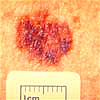

In [ ]:
import numpy as np
from PIL import Image

img = Image.open('images/melanoma/mel01_sm_enhanced.jpg')
img

In [ ]:
# Uncomment if using local repo
# import sys
# sys.path.append('..')
from ISR.models import RDN, RRDN

#model = RDN(weights='noise-cancel')
#model = RRDN(weights='gans')
#model = RDN(weights='psnr-small')
model = RDN(weights='psnr-large')

66076672/66071288 [==============================] - 3s 0us/step


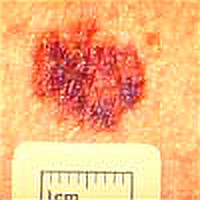

In [ ]:
sr_img = model.predict(np.array(img))
Image.fromarray(sr_img)

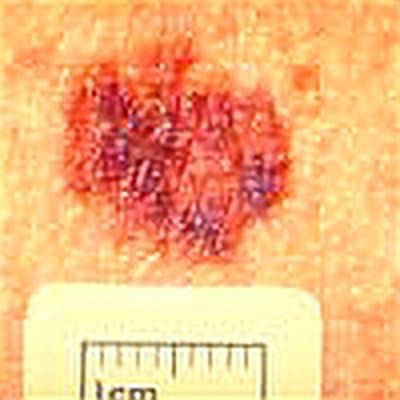

In [ ]:
im = Image.fromarray(sr_img)
im.size
im.resize((400,400))

In [ ]:
im.resize((500,500)).save("bla.jpg", dpi=(400, 400))

In [ ]:
from PIL.ExifTags import TAGS
im = Image.open("images/pulmonary carcinoma/img_2435.jpg")
exifdata=im.getexif()
for tag_id in exifdata:
  tag = TAGS.get(tag_id, tag_id)
  data = exifdata.get(tag_id)
  # decode bytes 
  #if isinstance(data, bytes):
  #    data = data.decode()
  print(f"{tag:25}: {data}")


ExifVersion              : b'0230'
ComponentsConfiguration  : b'\x01\x02\x03\x00'
CompressedBitsPerPixel   : (3, 1)
DateTimeOriginal         : 2016:05:05 10:41:34
DateTimeDigitized        : 2016:05:05 10:41:34
ShutterSpeedValue        : (138, 32)
ApertureValue            : (95, 32)
ExposureBiasValue        : (0, 3)
MaxApertureValue         : (95, 32)
MeteringMode             : 5
Flash                    : 16
FocalLength              : (15100, 1000)
UserComment              : b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
import cv2 as cv
import numpy as np

def show(final):
    print('display')
    cv.imshow('Temple', final)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Insert any filename with path
img = cv.imread('bla.jpg')
def white_balance(img):
    result = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv.cvtColor(result, cv.COLOR_LAB2BGR)
    return result

balanced_img = np.zeros_like(img) #Initialize final image

for i in range(3): #i stands for the channel index 
    hist, bins = np.histogram(img[..., i].ravel(), 256, (0, 256))
    bmin = np.min(np.where(hist>(hist.sum()*0.0005)))
    bmax = np.max(np.where(hist>(hist.sum()*0.0005)))
    balanced_img[...,i] = np.clip(img[...,i], bmin, bmax)
    balanced_img[...,i] = (balanced_img[...,i]-bmin) / (bmax - bmin) * 255
cv.imwrite('bla2.jpg', balanced_img)



True

In [ ]:
im = Image.open('bla2.jpg')
im.save('bla.tif', compression='deflate')

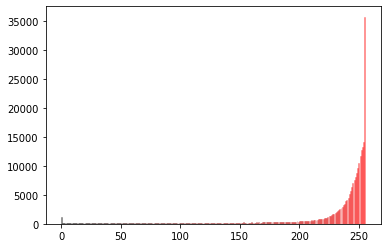

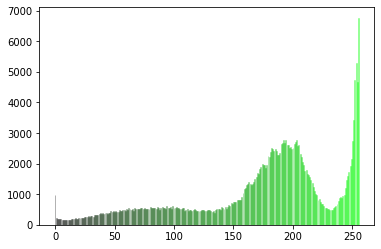

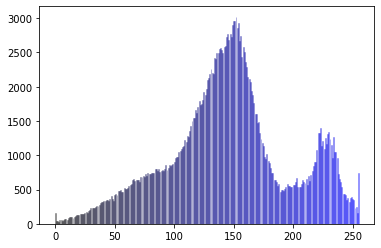

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def getRed(redVal):
    return '#%02x%02x%02x' % (redVal, 0, 0)

def getGreen(greenVal):
    return '#%02x%02x%02x' % (0, greenVal, 0)

def getBlue(blueVal):
    return '#%02x%02x%02x' % (0, 0, blueVal)
 
# Create an Image with specific RGB value

image = Image.open("./bla.tif")

# Modify the color of two pixels
image.putpixel((0,1), (1,1,5))
image.putpixel((0,2), (2,1,5))

# Display the image
image.show()

# Get the color histogram of the image
histogram = image.histogram()

# Take only the Red counts
l1 = histogram[0:256]

# Take only the Blue counts
l2 = histogram[256:512]

# Take only the Green counts
l3 = histogram[512:768]

plt.figure(0)

# R histogram

for i in range(0, 256):
    plt.bar(i, l1[i], color = getRed(i), edgecolor=getRed(i), alpha=0.3)

# G histogram

plt.figure(1)

for i in range(0, 256):
    plt.bar(i, l2[i], color = getGreen(i), edgecolor=getGreen(i),alpha=0.3)


# B histogram
plt.figure(2)
for i in range(0, 256):
    plt.bar(i, l3[i], color = getBlue(i), edgecolor=getBlue(i),alpha=0.3)

plt.show()